In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 1. MNIST train, test dataset 가져오기

In [2]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),target_transform=None, download=True) #train 용으로 쓰겠다.
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),target_transform=None, download=True) #test 용으로 쓰겠다.

# 2. 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


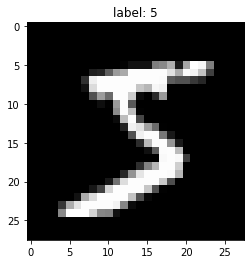

In [8]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데아터
print ("image data 형태:", image.size())
print ("label: ", label)

# 그리기
img = image.numpy() # image타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label )
plt.imshow(img[0], cmap='gray')
plt.show()

# 3. 데이터 로드함수

#### 학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [9]:
# hyper parameters
batch_size = 1024
learning_rate = 0.01 # 0.1, 0.01, 0.001, 0.0001, ...
num_epoch = 400

In [10]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

#### 데이터 로드함수 이해하기

[0]
한번에 로드되는 데이터 크기: 1024


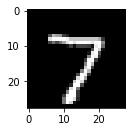

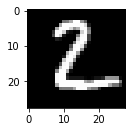

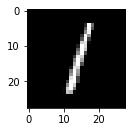

[1]
한번에 로드되는 데이터 크기: 1024


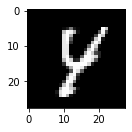

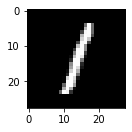

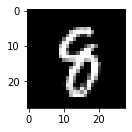

[2]
한번에 로드되는 데이터 크기: 1024


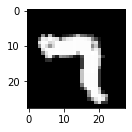

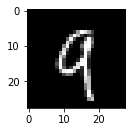

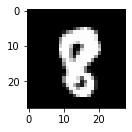

[3]
한번에 로드되는 데이터 크기: 1024


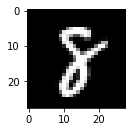

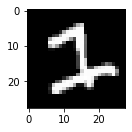

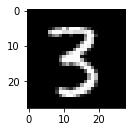

[4]
한번에 로드되는 데이터 크기: 1024


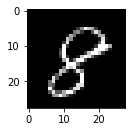

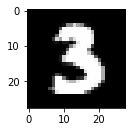

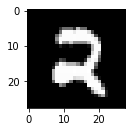

[5]
한번에 로드되는 데이터 크기: 1024


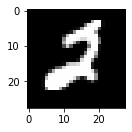

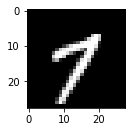

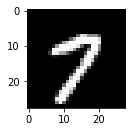

In [11]:
n = 3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader):
    if i>5:
        break
    
    print ("[%d]" %i)
    print ("한번에 로드되는 데이터 크기:", len(imgs))
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy() # image 타입을 numpy로 변환 (1,28,28)
        img = img.reshape((img.shape[1], img.shape[2])) # (1,28,28) -> (28,28)
        #print img.shape
        
        plt.subplot(1, n, j+1) # (1,3) 형태 플랏의 j번째 자리에 그리겠다~
        plt.imshow(img, cmap='gray')
        plt.show("label: &d" %labels[j] )
    plt.show()

# 모델 선언

In [12]:
# 모델 선언
# * 퍼셉트론(2 hidden layer) *
model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)
# 파라미터 보기
# print(list(model.parameters())) # 초기 파라미터 출력

In [13]:
#model = model.cuda() #GPU머신 있으면~

In [14]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_size 만큼
        img = imgs # x
        label = Variable(labels) # y
        #label = Variable(labels).cuda()
        #.cuda() : GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 에러남
        
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)
        #img = Variable(img, requires_grad=False).cuda()
        
        output = imodel(img) # forward propagation
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [15]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 10.188801765441895


# 5. loss, optimizer

In [ ]:
loss_func = nn.CrossEntropyLoss() # logit(# of classes), target(1)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 6. 학습

In [ ]:
num_epoch = 400
for i in range(num_epoch):
    for j, [imgs, labels] in enumerate(train_loader):
        img = imgs # (batch_size, 1, 28, 28)
        label = Variable(labels) # (batch_size)
        
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=True)
        
        optimizer.zero_grad()
        output = model(img) # forward propagation
        loss = loss_func(output, label) # logit(# of classes), target(1)
        
        loss.backward() # back propagation, weight 노드에 저장
        optimizer.step() # weight 조정 , 노드에 저장된 Gradient 값으로 weight 업데이트
        
    if i%50==0:
        print("%d.." %i)
        ComputeAccr(test_loader, model)
        print(loss)

# 7. 테스트

In [ ]:
ComputeAccr(test_loader, model) 

# 8. 학습된 파라미터 저장

In [ ]:
netname - './nets/mlp_weight.pkl'
torch.save(model, netname, )

#model = torch.load(netname)

# 9. (Optional) 실습1 에 쓰인 .npz 만드려면?

In [ ]:
np.savez_compressed('.nets/mlp_weight.npz',
                   W1=W1, b1=b1,
                   W2=W2, b2=b2,
                   W3=W3, b3=b3)